<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/logistic-regression/donut_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000 
D = 2

In [3]:
R_inner = 5
R_outer = 10

In [4]:
# normally distributed data
R1= np.random.randn(N//2) + R_inner

# angles
theta = 2*np.pi*np.random.random(N//2)

X_inner = np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

In [5]:
# normally distributed data
R2= np.random.randn(N//2) + R_outer

# angles
theta = 2*np.pi*np.random.random(N//2)

X_outer = np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

In [6]:
X = np.concatenate([ X_inner, X_outer ])

# labels: first 500 are 0, last 500 are 1
T = np.array([0]*(N//2) + [1]*(N//2)) 

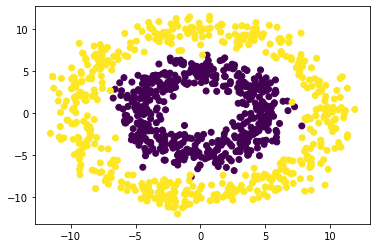

In [7]:
plt.scatter(X[:,0], X[:,1], c=T)
plt.show()


In [8]:
# add a column of ones
ones = np.ones((N, 1))

In [9]:
# add a column of r = sqrt(x^2 + y^2)
r = np.sqrt((X*X).sum(axis=1)).reshape(-1,1)
X2 = np.concatenate((ones,r,X),axis=1)

In [10]:
# randomly initialize the weights
w = np.random.randn(D + 2)

In [11]:
# calculate the model output
z = X2.dot(w)

In [12]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [13]:
Y = sigmoid(z)

In [14]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [16]:
learning_rate = 0.0001
error = []
for i in range(5000):
  e = cross_entropy(T,Y)
  error.append(e)
  if i % 500 == 0:
    print(e)

  # gradiente descent weight update with regularization 
  w+= learning_rate*(X2.T.dot(T-Y) - 0.1*w)

  # recalculate Y
  Y = sigmoid(X2.dot(w))

4300.947867768648
239.36960009148507
150.6073545696986
114.96673077557901
95.53791910935941
83.20059379902968
74.61803815506921
68.27441766805477
63.378862375415785
59.476902316937775


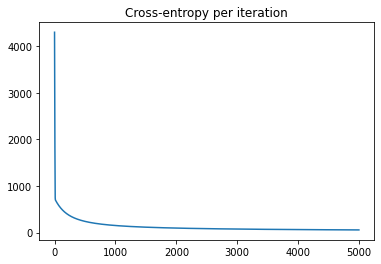

In [17]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

In [18]:
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

Final w: [-1.15704299e+01  1.57164471e+00 -1.90484049e-02 -9.84185380e-03]
Final classification rate: 0.993
